In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [3]:
with open('./adjusted/wealth_std_2.pkl', 'rb') as f:
    wealth_std = pickle.load(f)
with open('./adjusted/wealth_reg_2.pkl', 'rb') as f:
    wealth_reg = pickle.load(f)
with open('./adjusted/wealth_half_2.pkl', 'rb') as f:
    wealth_half = pickle.load(f)
with open('./adjusted/wealth_risk_2.pkl', 'rb') as f:
    wealth_risk = pickle.load(f)

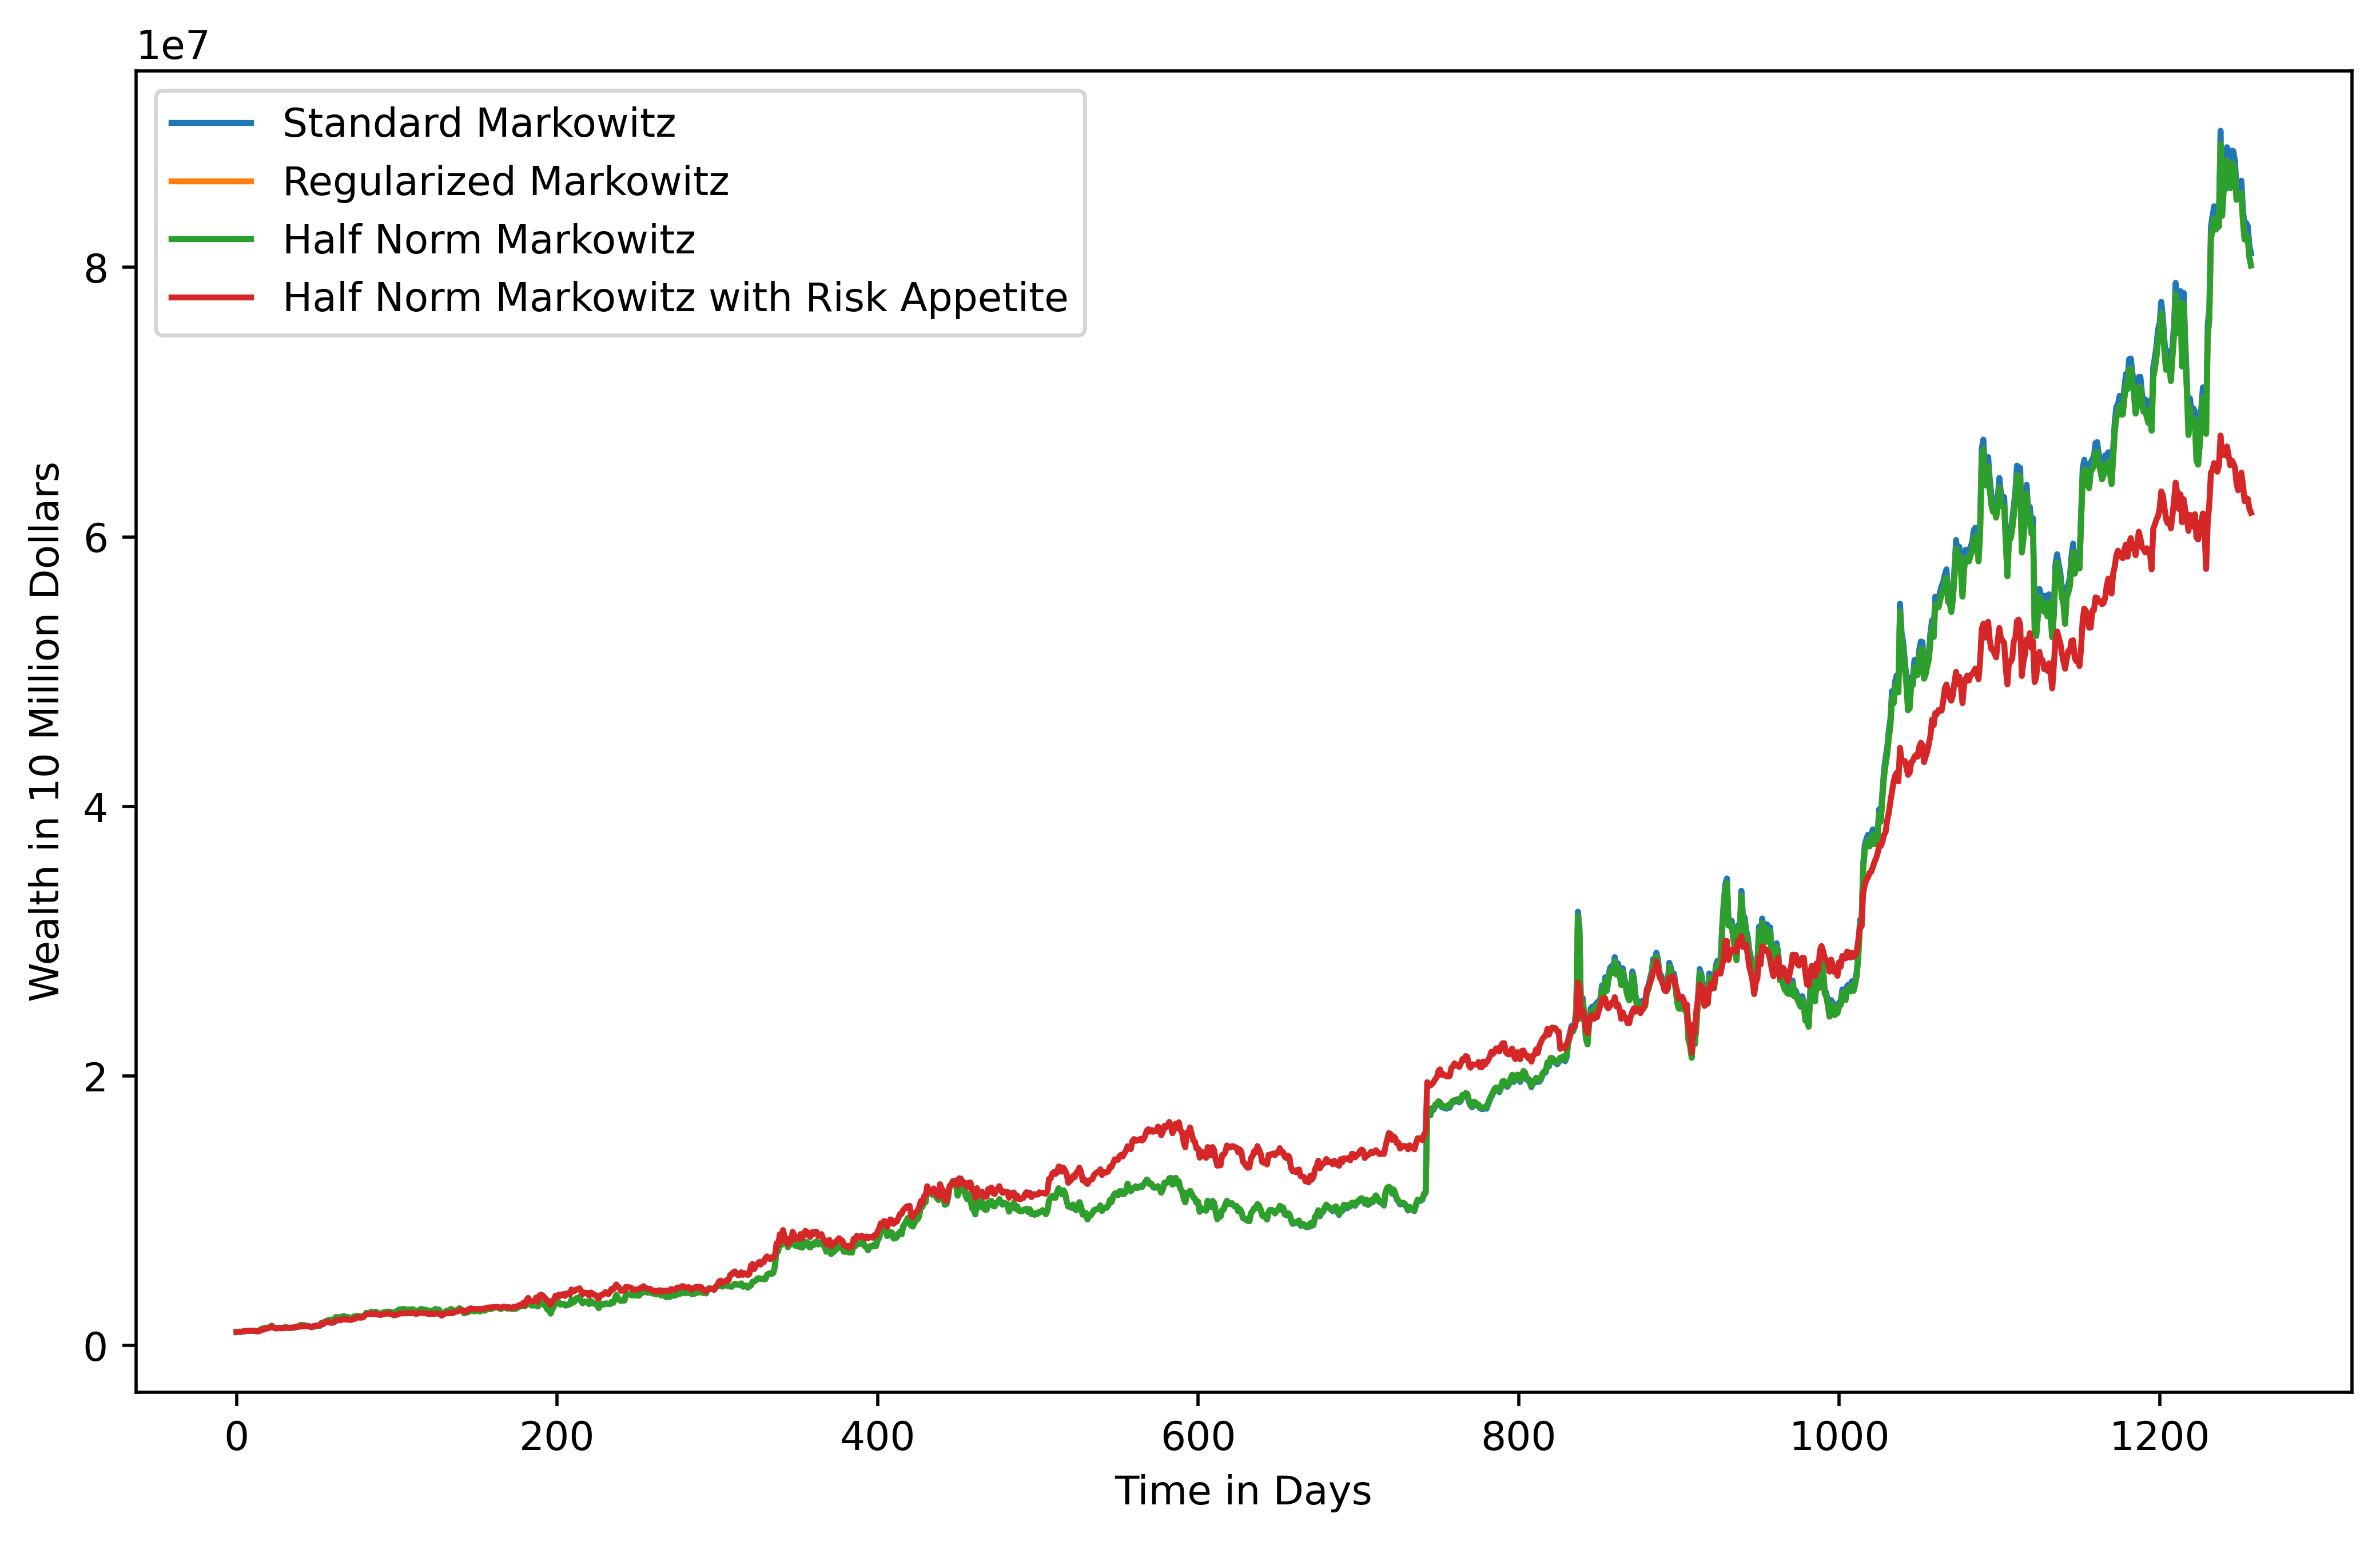

In [15]:
plt.figure(figsize=(10, 6), dpi=500)
plt.plot(wealth_std, label='Standard Markowitz')
plt.plot(wealth_reg, label='Regularized Markowitz')
plt.plot(wealth_half, label='Half Norm Markowitz')
plt.plot(wealth_risk, label='Half Norm Markowitz with Risk Appetite')
plt.legend()
plt.xlabel('Time in Days')
plt.ylabel('Wealth in 10 Million Dollars')
plt.savefig('./adjusted/wealth.png', dpi=500)

In [16]:
with open('./adjusted/weights_std_2.pkl', 'rb') as f:
    weights_std = pickle.load(f)
with open('./adjusted/weights_reg_2.pkl', 'rb') as f:
    weights_reg = pickle.load(f)
with open('./adjusted/weights_half_2.pkl', 'rb') as f:
    weights_half = pickle.load(f)
with open('./adjusted/weights_risk_2.pkl', 'rb') as f:
    weights_risk = pickle.load(f)    

In [31]:
tickers = ["SO", "KMB", "K", "AZO", "GIS", "HSY",
           "PEP", "WMT", "NEM", "MCD", "AAPL", "CPB", "CAG", "PPL", "DUK", "SYY",
           "REGN", "ABT", "JNJ", "ORLY", "MNST", "SHW",
           "THC", "GILD", "PG", "LLY", "BIIB", "DVA", "HUM", "CI", "UNH", "WBA",
                "CVS", "AET", "AMGN", "BMY", "MRK",
                "PFE", "JPM", "BAC", "WFC", "C", "MS",
                "GS", "USB", "AXP", "COF", "DFS", "CB",
                "MET", "PRU", "ALL", "AIG", "AFL", "TRV",
                "MMC", "HIG", "CINF", "HON", "GE", "MMM",
                "CAT", "DE", "PH", "ITW", "EMR", "ETN",
                "DOV", "FLS", "ROP", "SWK", "PNR",
                "AME", "NOC", "GD", "LMT",
                  "TXT", "BA", "TDG"]

tickers.sort()

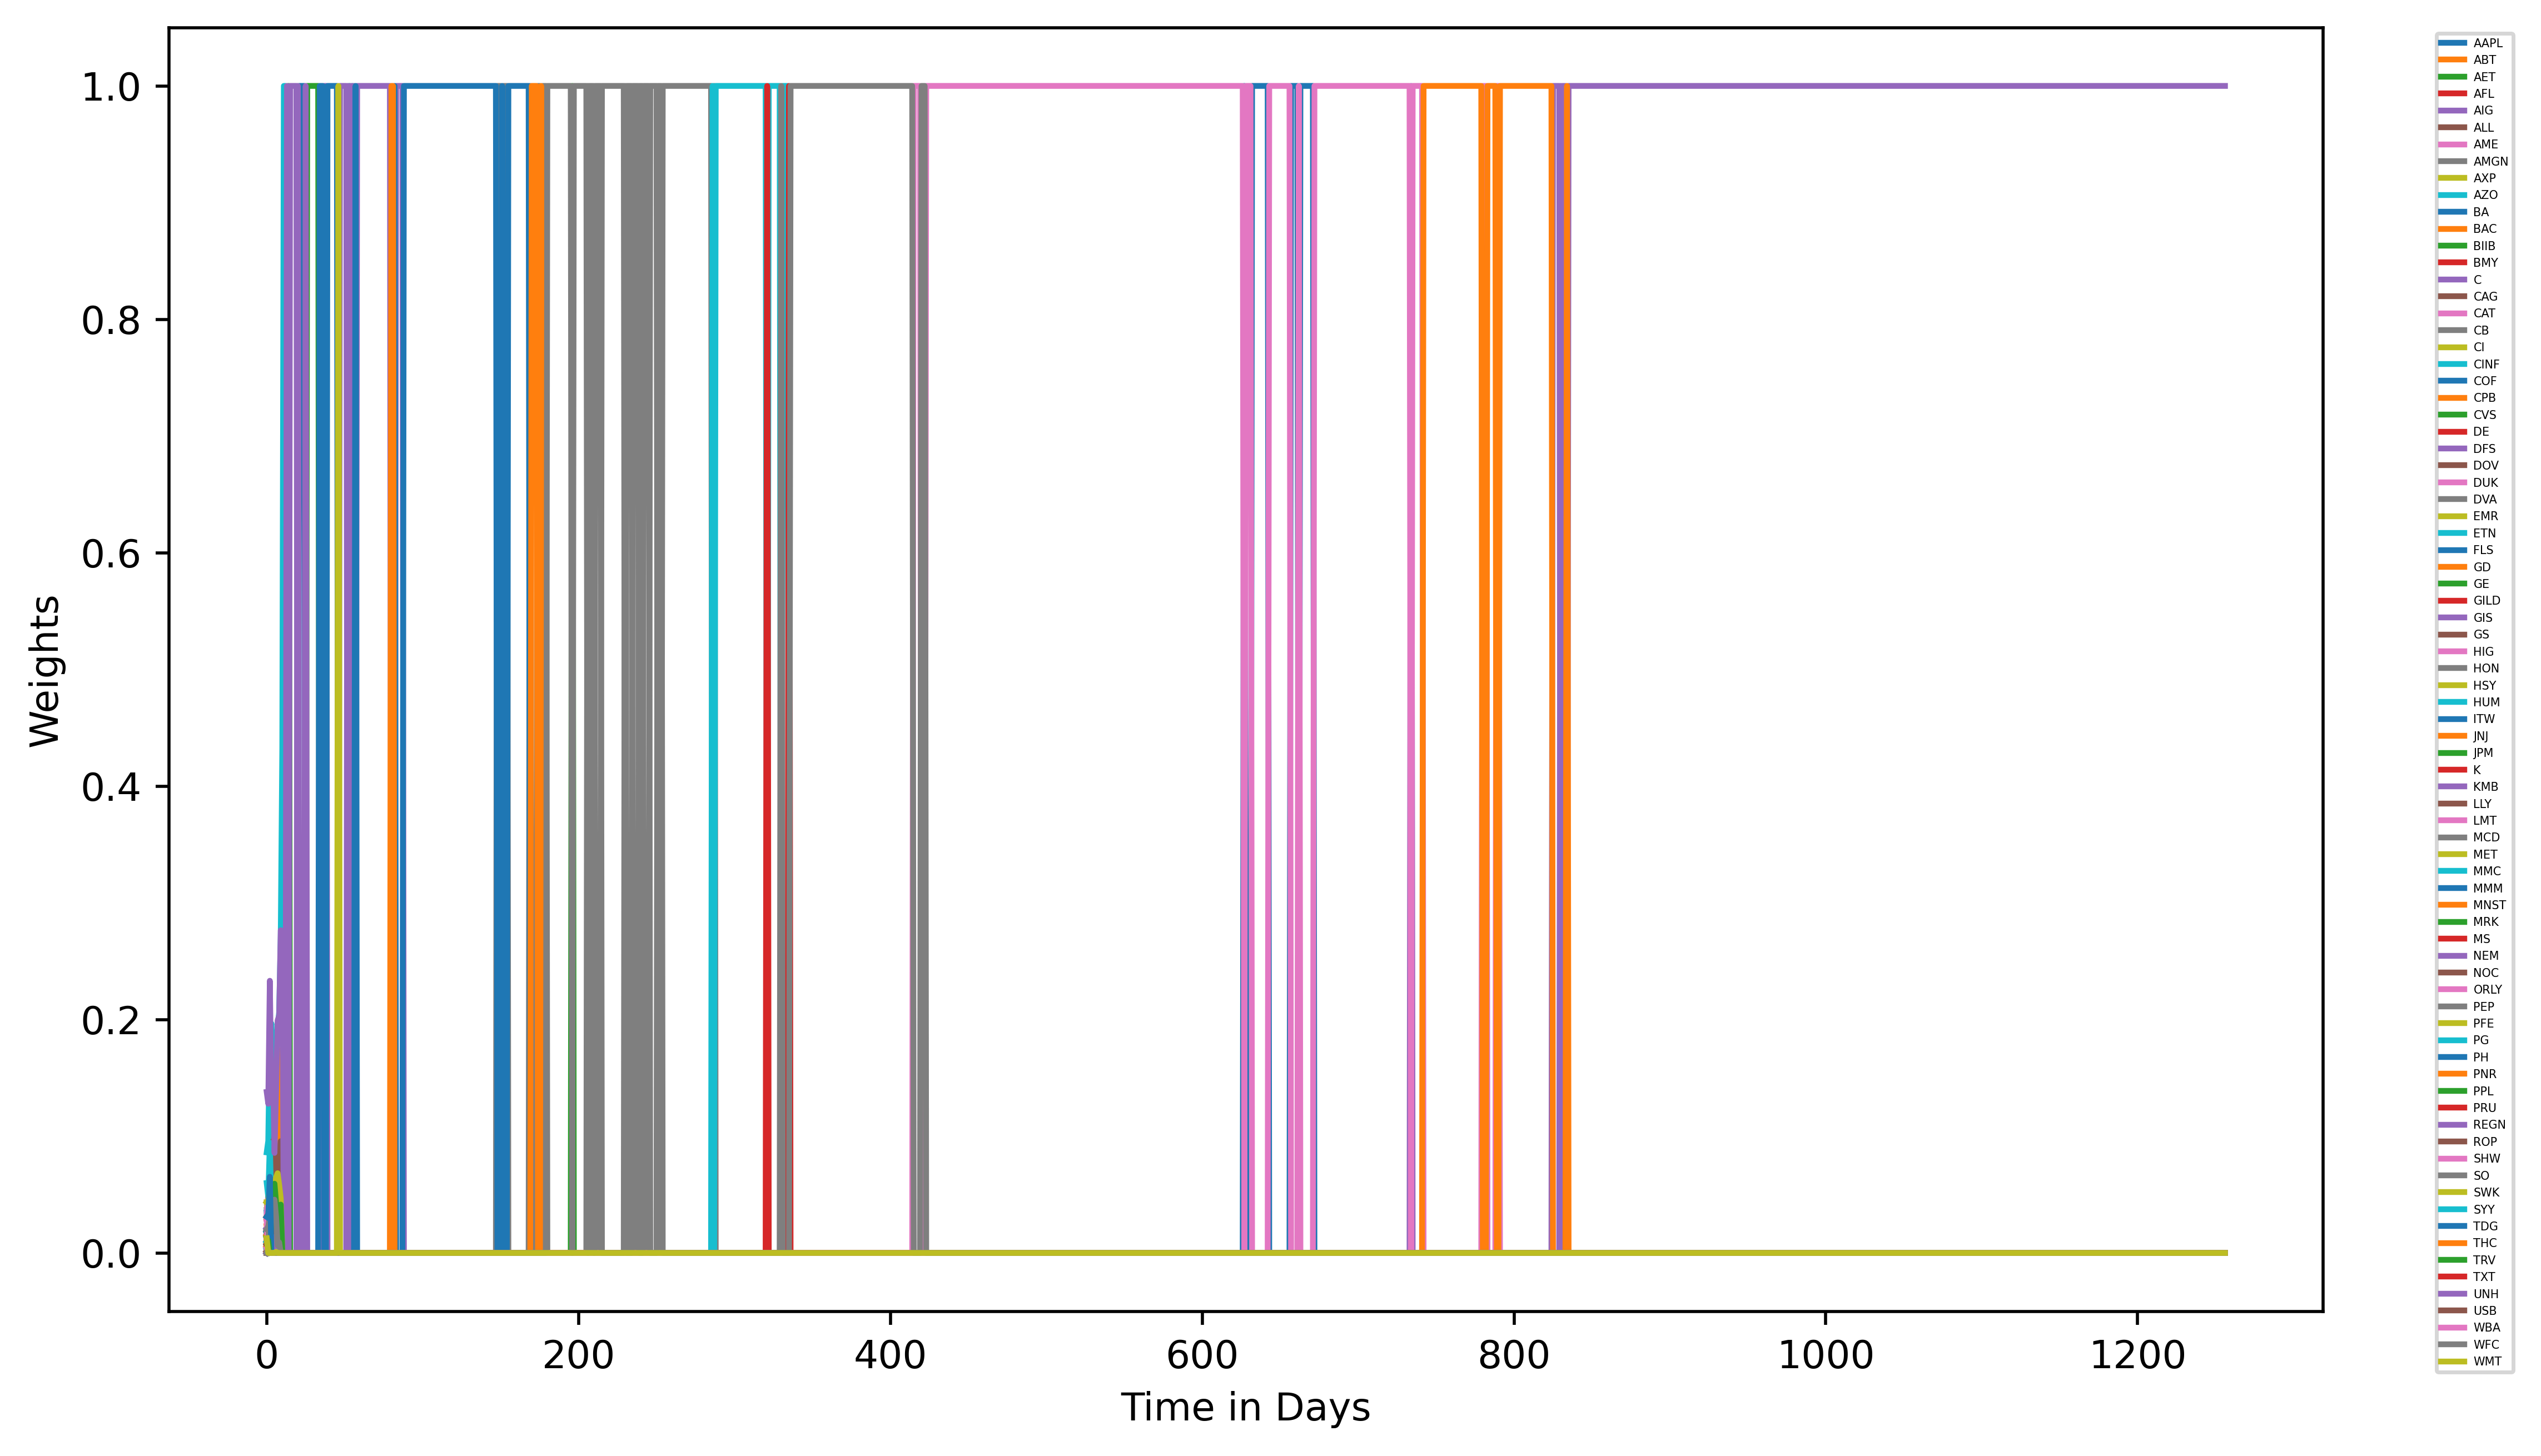

In [46]:

new_weights_std = []
for j in range(0, len(weights_std[0])):
    x = []
    for i in range(0, len(weights_std)):
        x.append(weights_std[i][j])
    new_weights_std.append(x)
    
# Stack plots for each ticker
fig = plt.figure(figsize=(10, 6), dpi=500)
for i in range(0, len(tickers)):
    plt.plot(new_weights_std[i], label=tickers[i])
plt.legend(prop={'size': 3}, bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Time in Days')
plt.ylabel('Weights')
plt.savefig('./adjusted/weights_std.png', dpi=500)

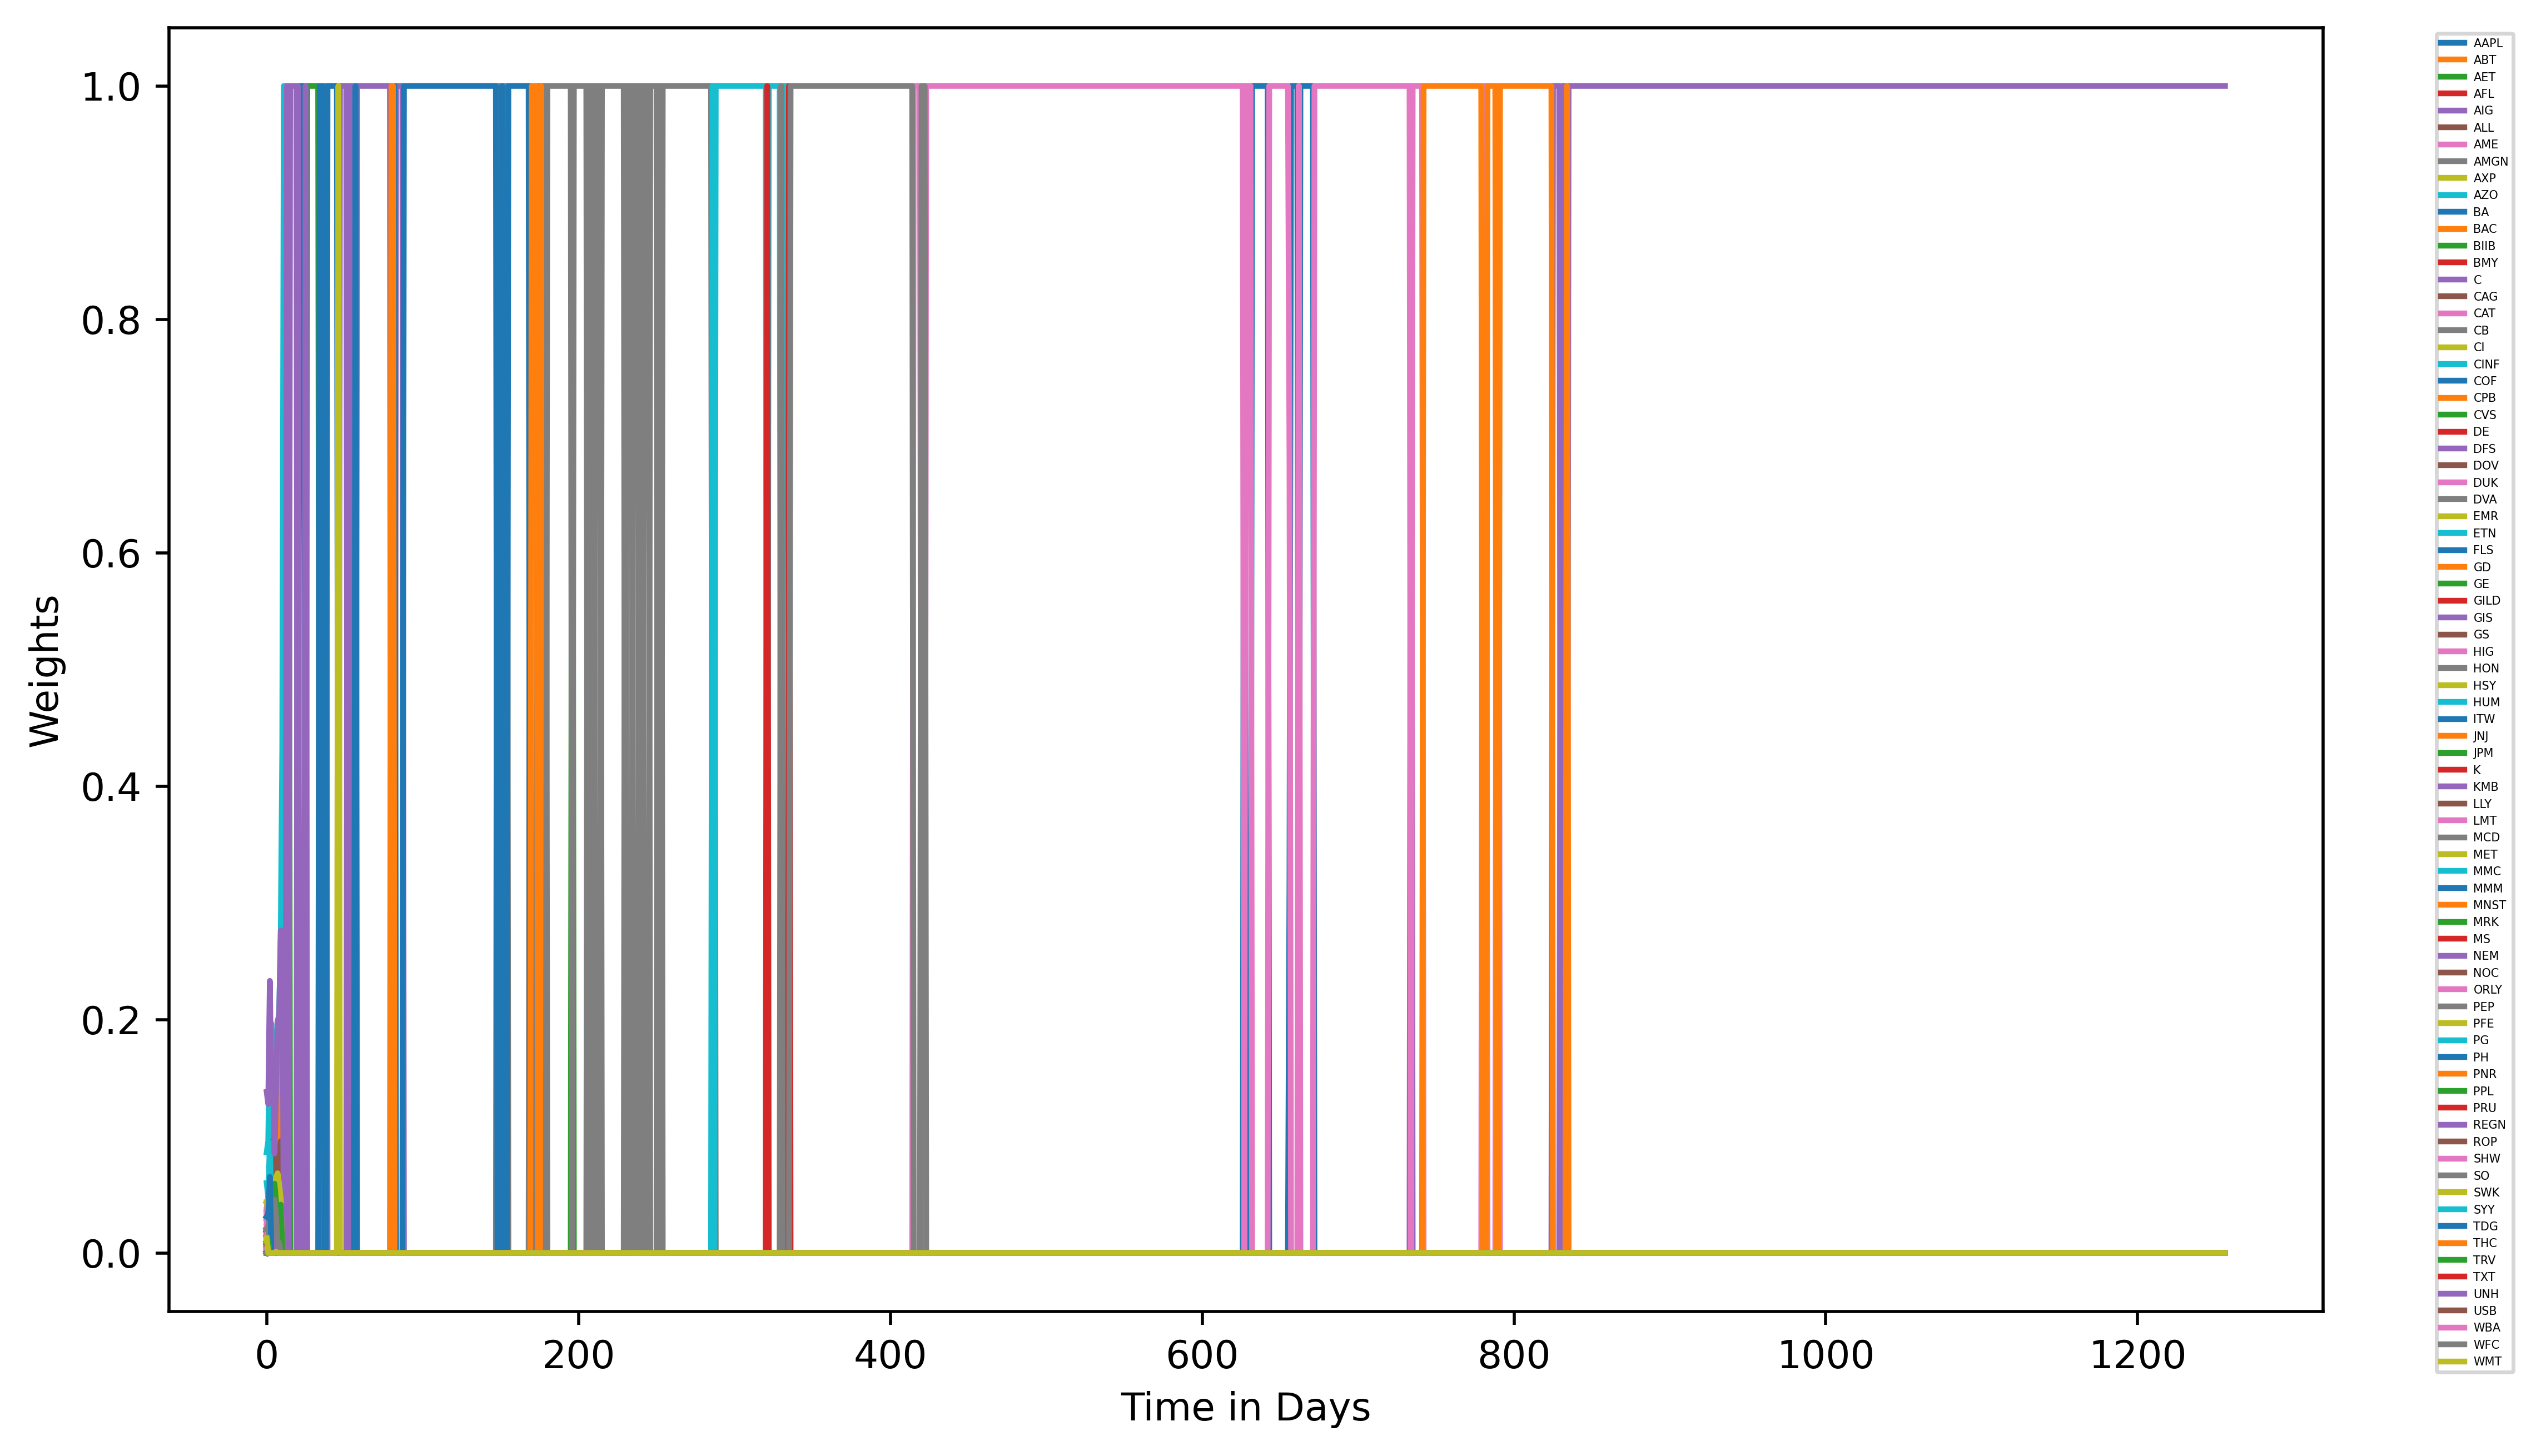

In [47]:

new_weights_reg = []
for j in range(0, len(weights_reg[0])):
    x = []
    for i in range(0, len(weights_reg)):
        x.append(weights_reg[i][j])
    new_weights_reg.append(x)

fig = plt.figure(figsize=(10, 6), dpi=500)
for i in range(0, len(tickers)):
    plt.plot(new_weights_reg[i], label=tickers[i])
plt.legend(prop={'size': 3}, bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Time in Days')
plt.ylabel('Weights')
plt.savefig('./adjusted/weights_reg.png', dpi=500)

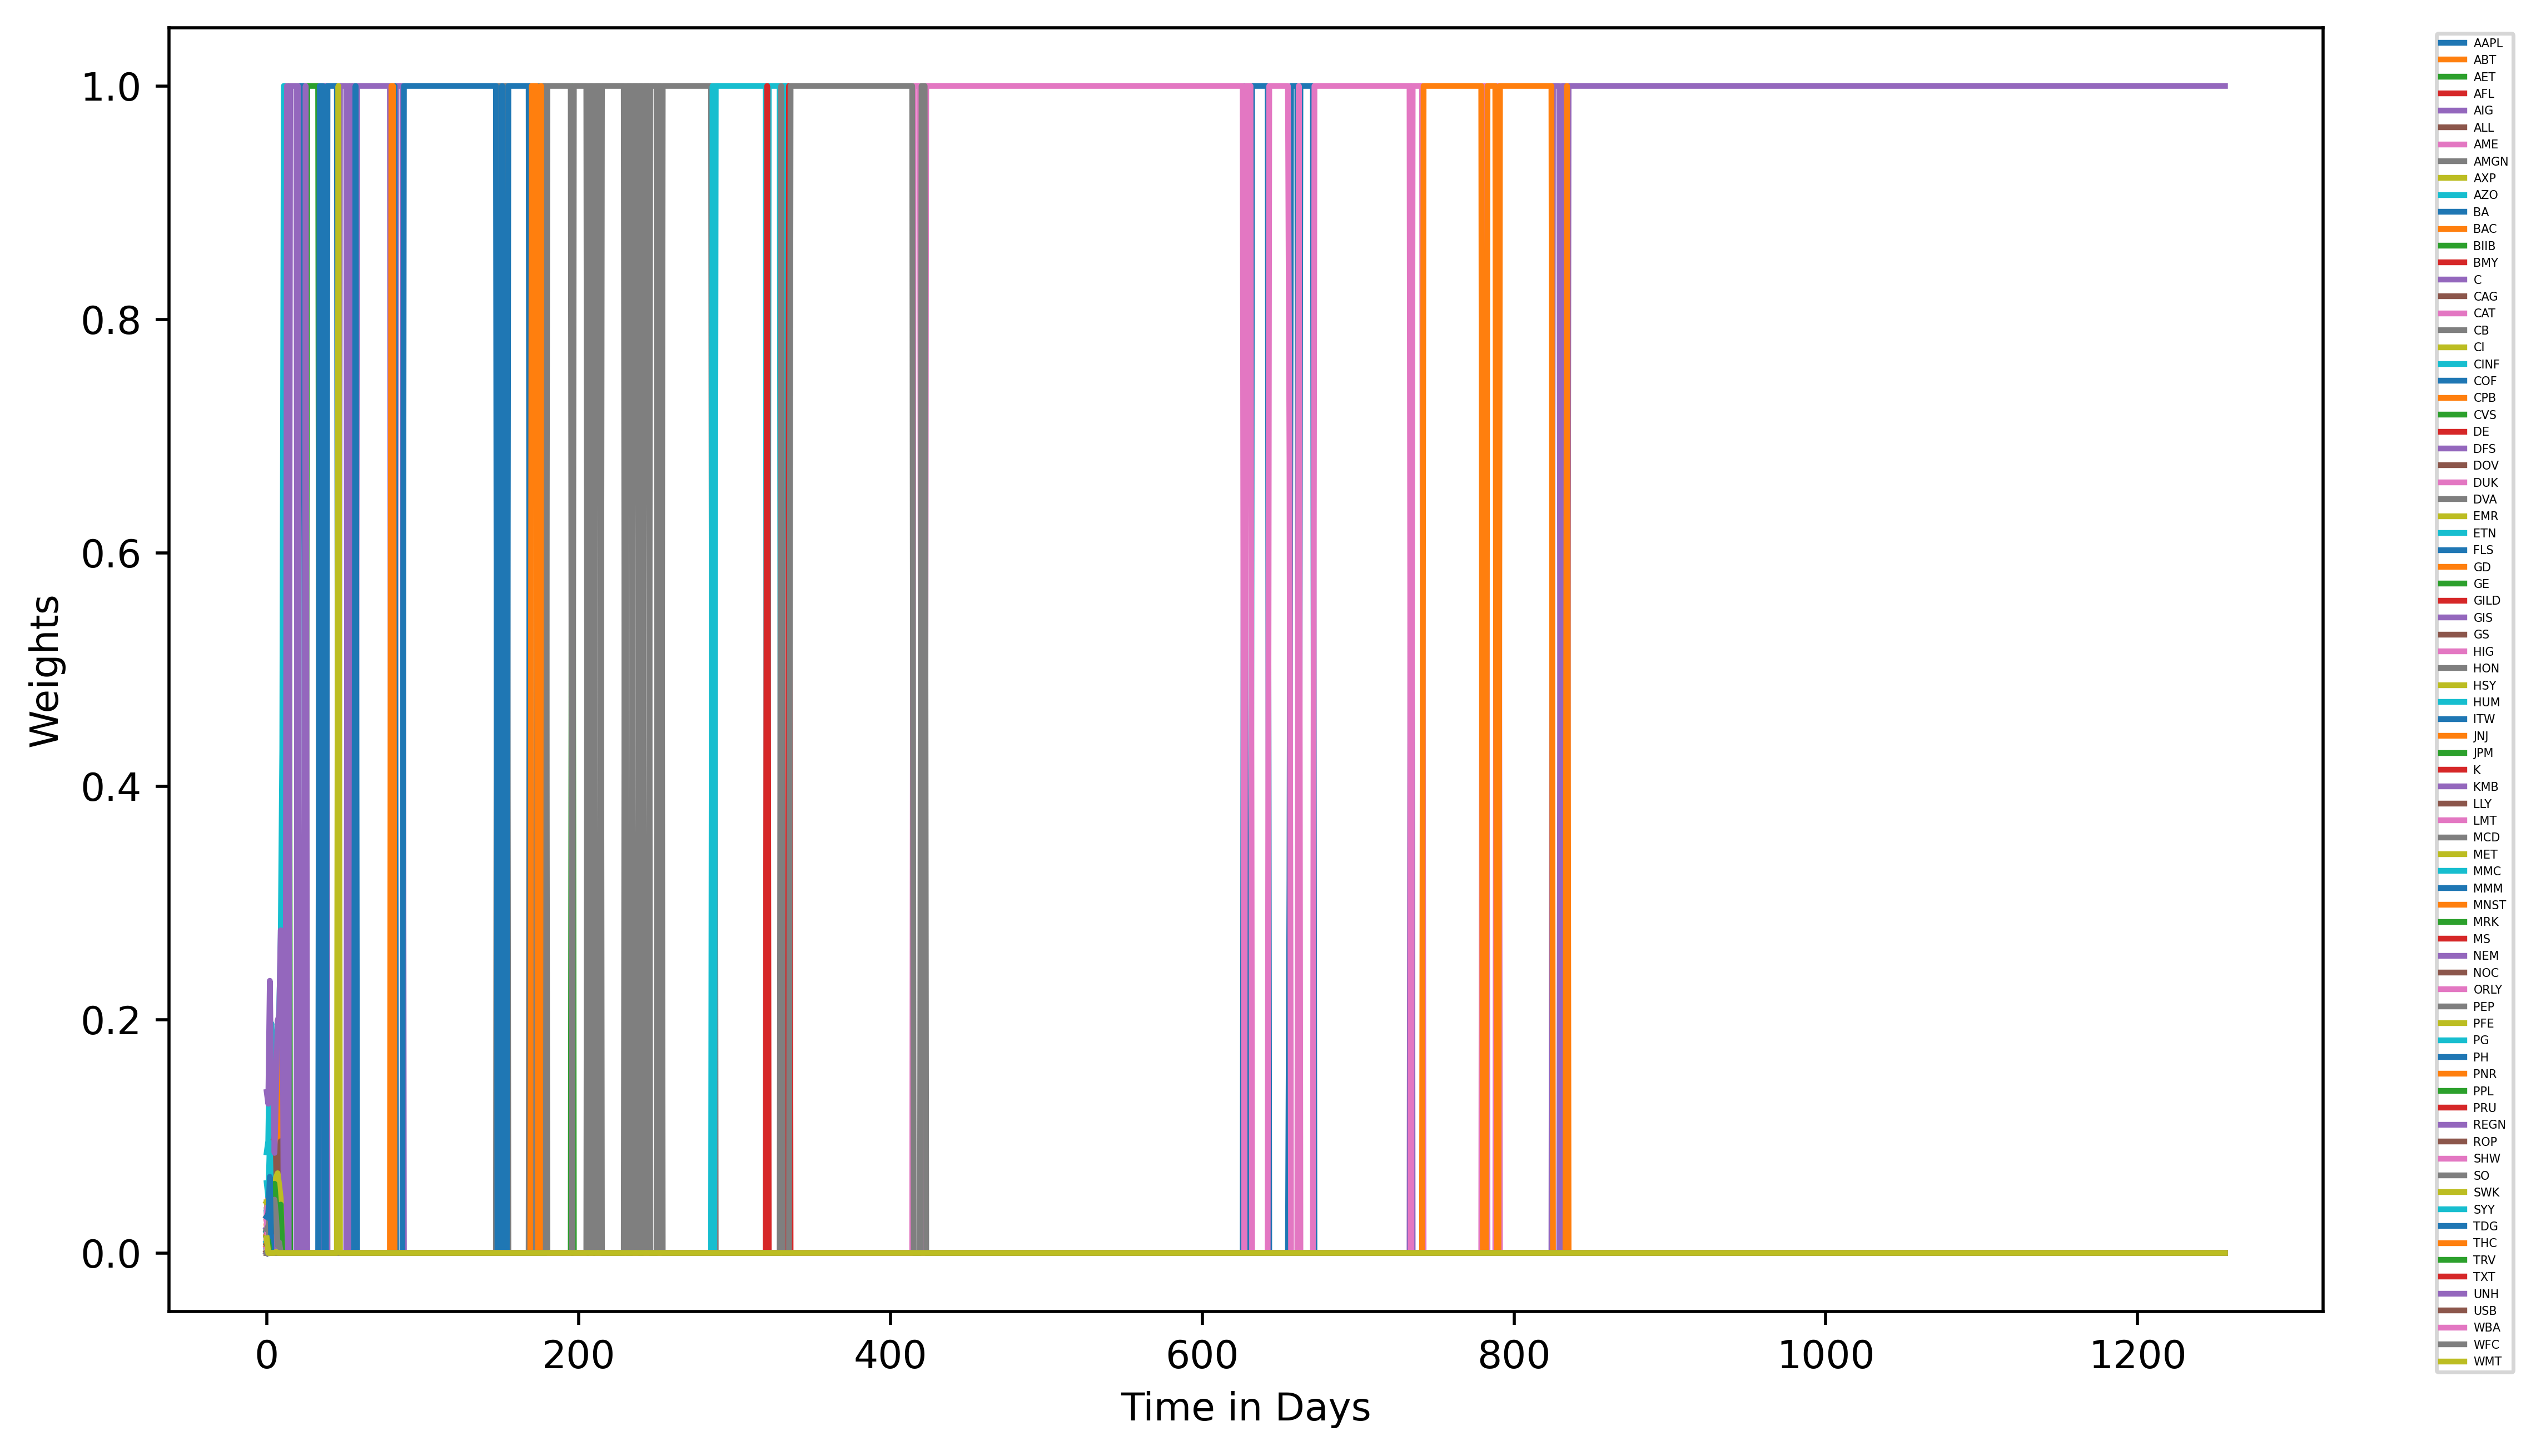

In [48]:

new_weights_half = []
for j in range(0, len(weights_half[0])):
    x = []
    for i in range(0, len(weights_half)):
        x.append(weights_half[i][j])
    new_weights_half.append(x)

fig = plt.figure(figsize=(10, 6), dpi=500)
for i in range(0, len(tickers)):
    plt.plot(new_weights_half[i], label=tickers[i])
plt.legend(prop={'size': 3}, bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Time in Days')
plt.ylabel('Weights')
plt.savefig('./adjusted/weights_half.png', dpi=500)

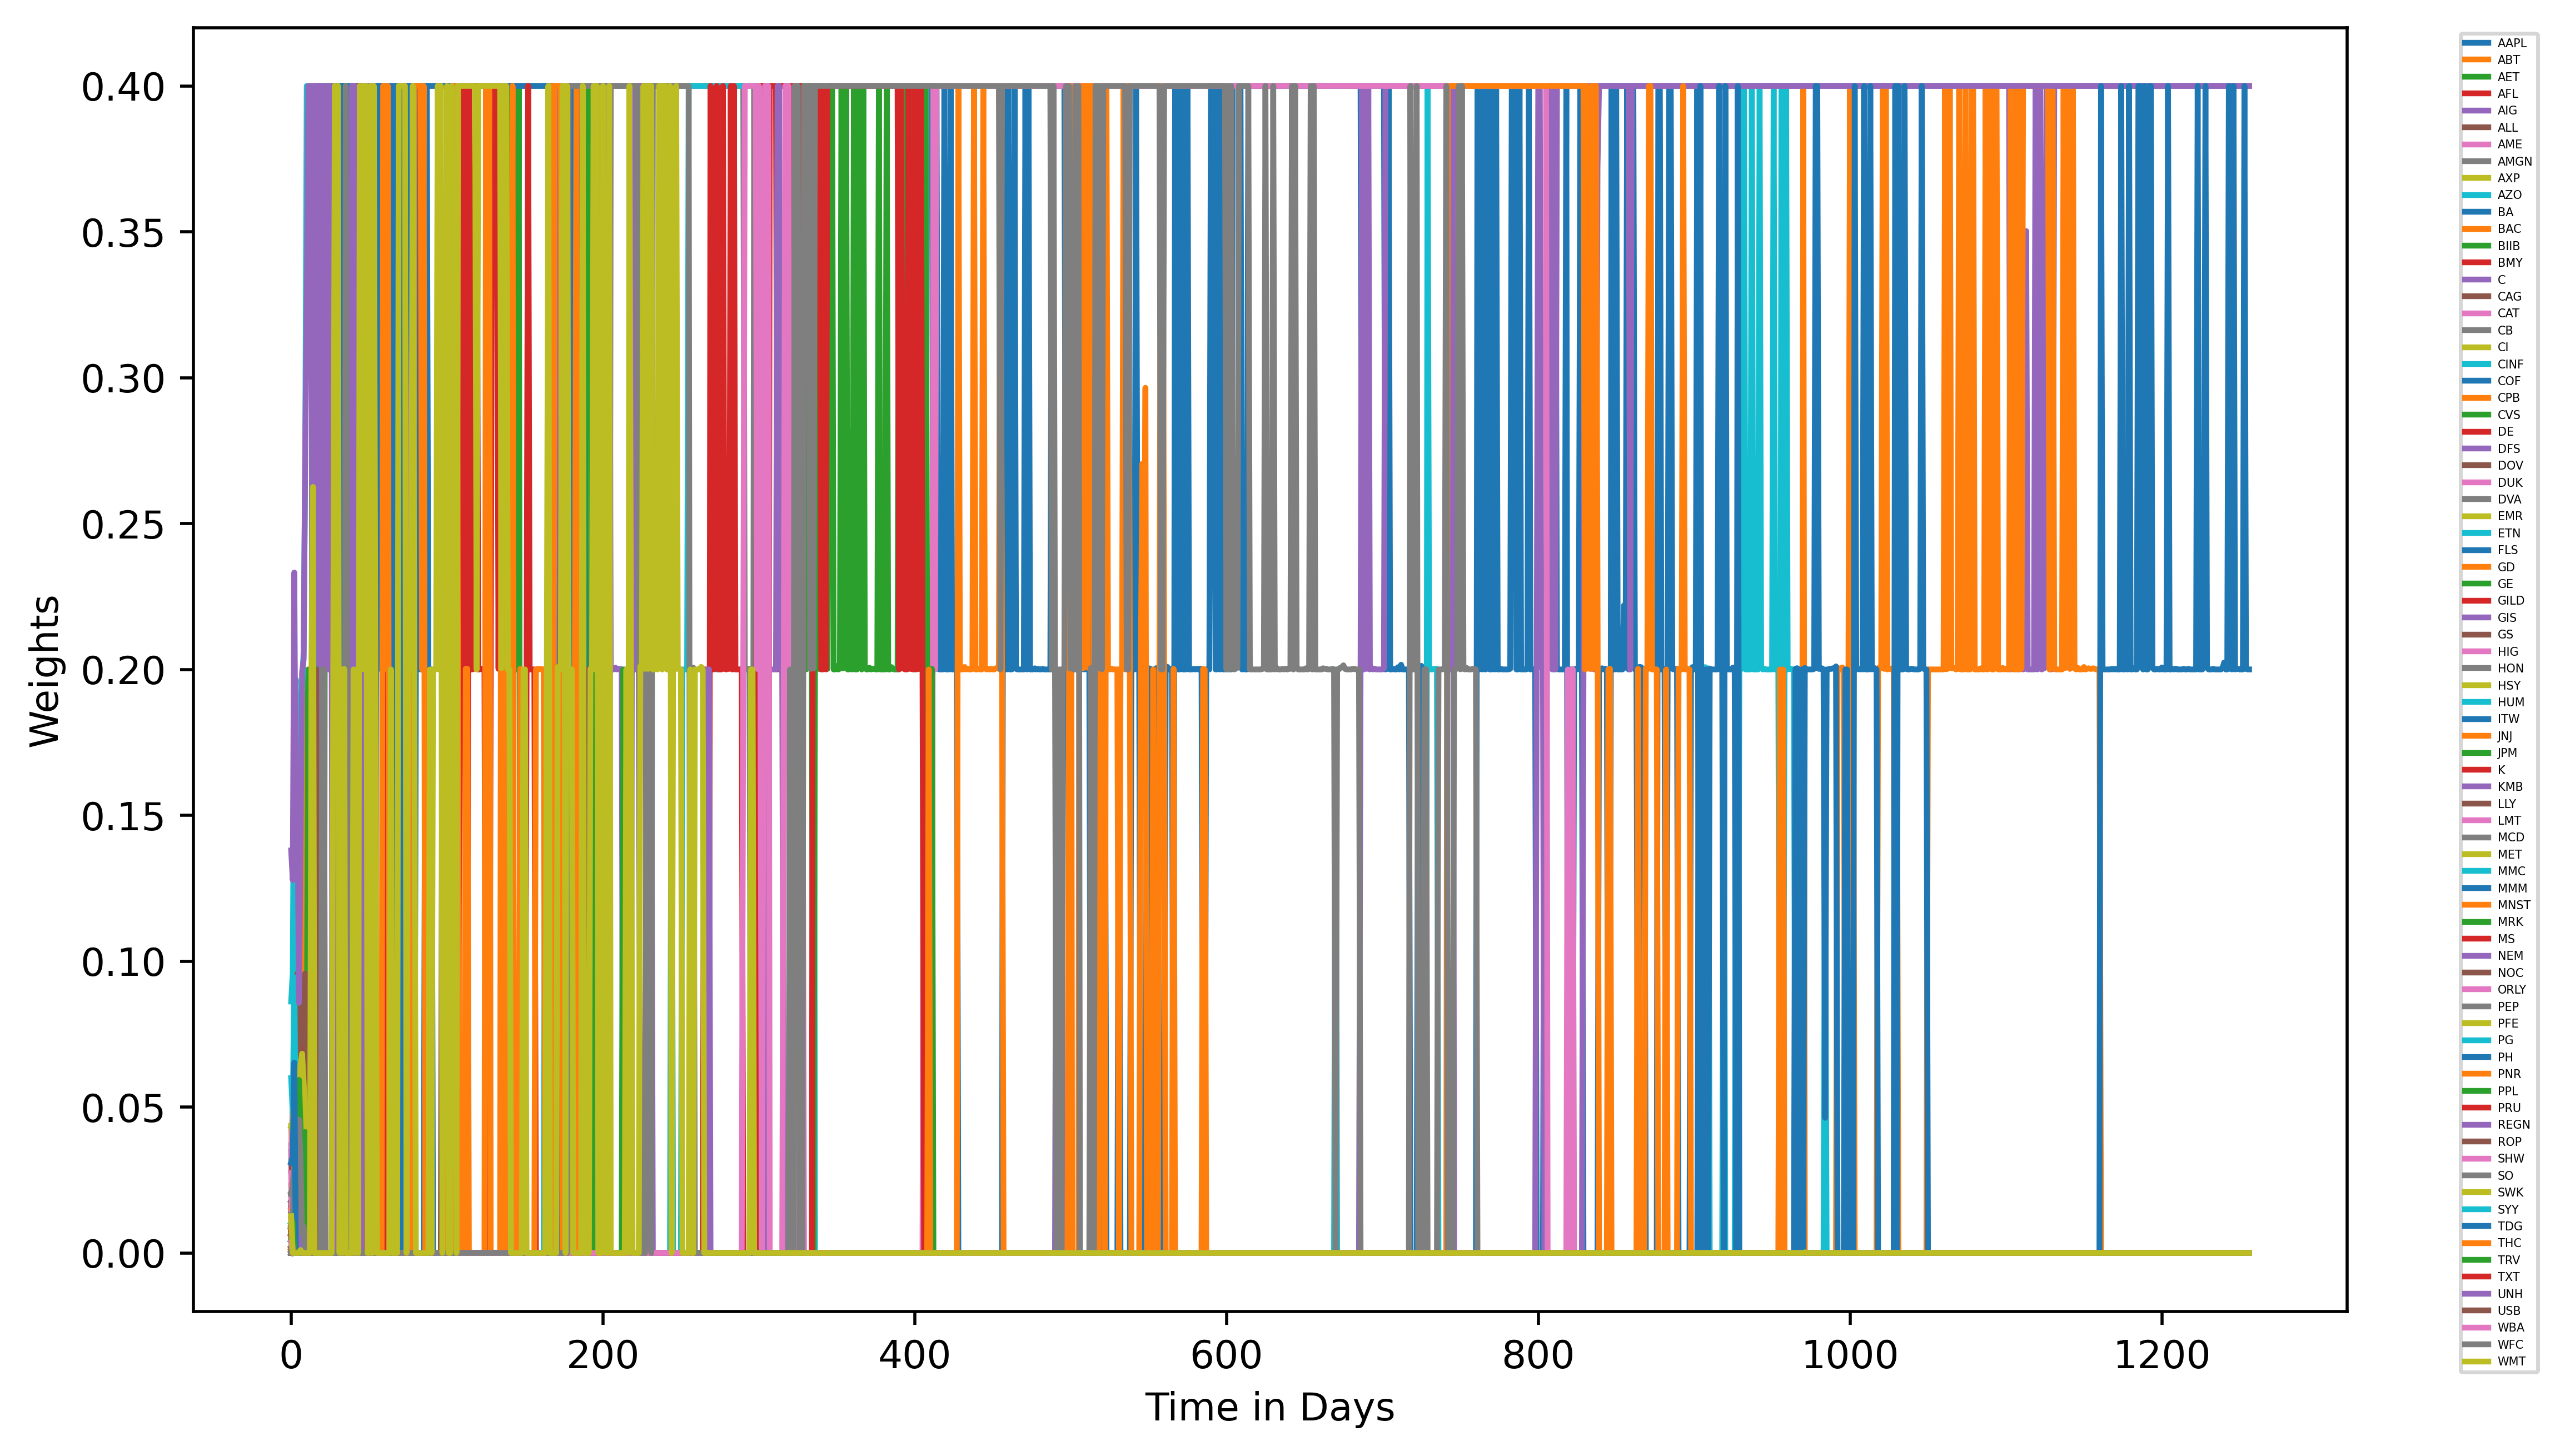

In [49]:

new_weights_risk = []
for j in range(0, len(weights_risk[0])):
    x = []
    for i in range(0, len(weights_risk)):
        x.append(weights_risk[i][j])
    new_weights_risk.append(x)

fig = plt.figure(figsize=(10, 6), dpi=500)
for i in range(0, len(tickers)):
    plt.plot(new_weights_risk[i], label=tickers[i])
plt.legend(prop={'size': 3}, bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Time in Days')
plt.ylabel('Weights')
plt.savefig('./adjusted/weights_risk.png', dpi=500)

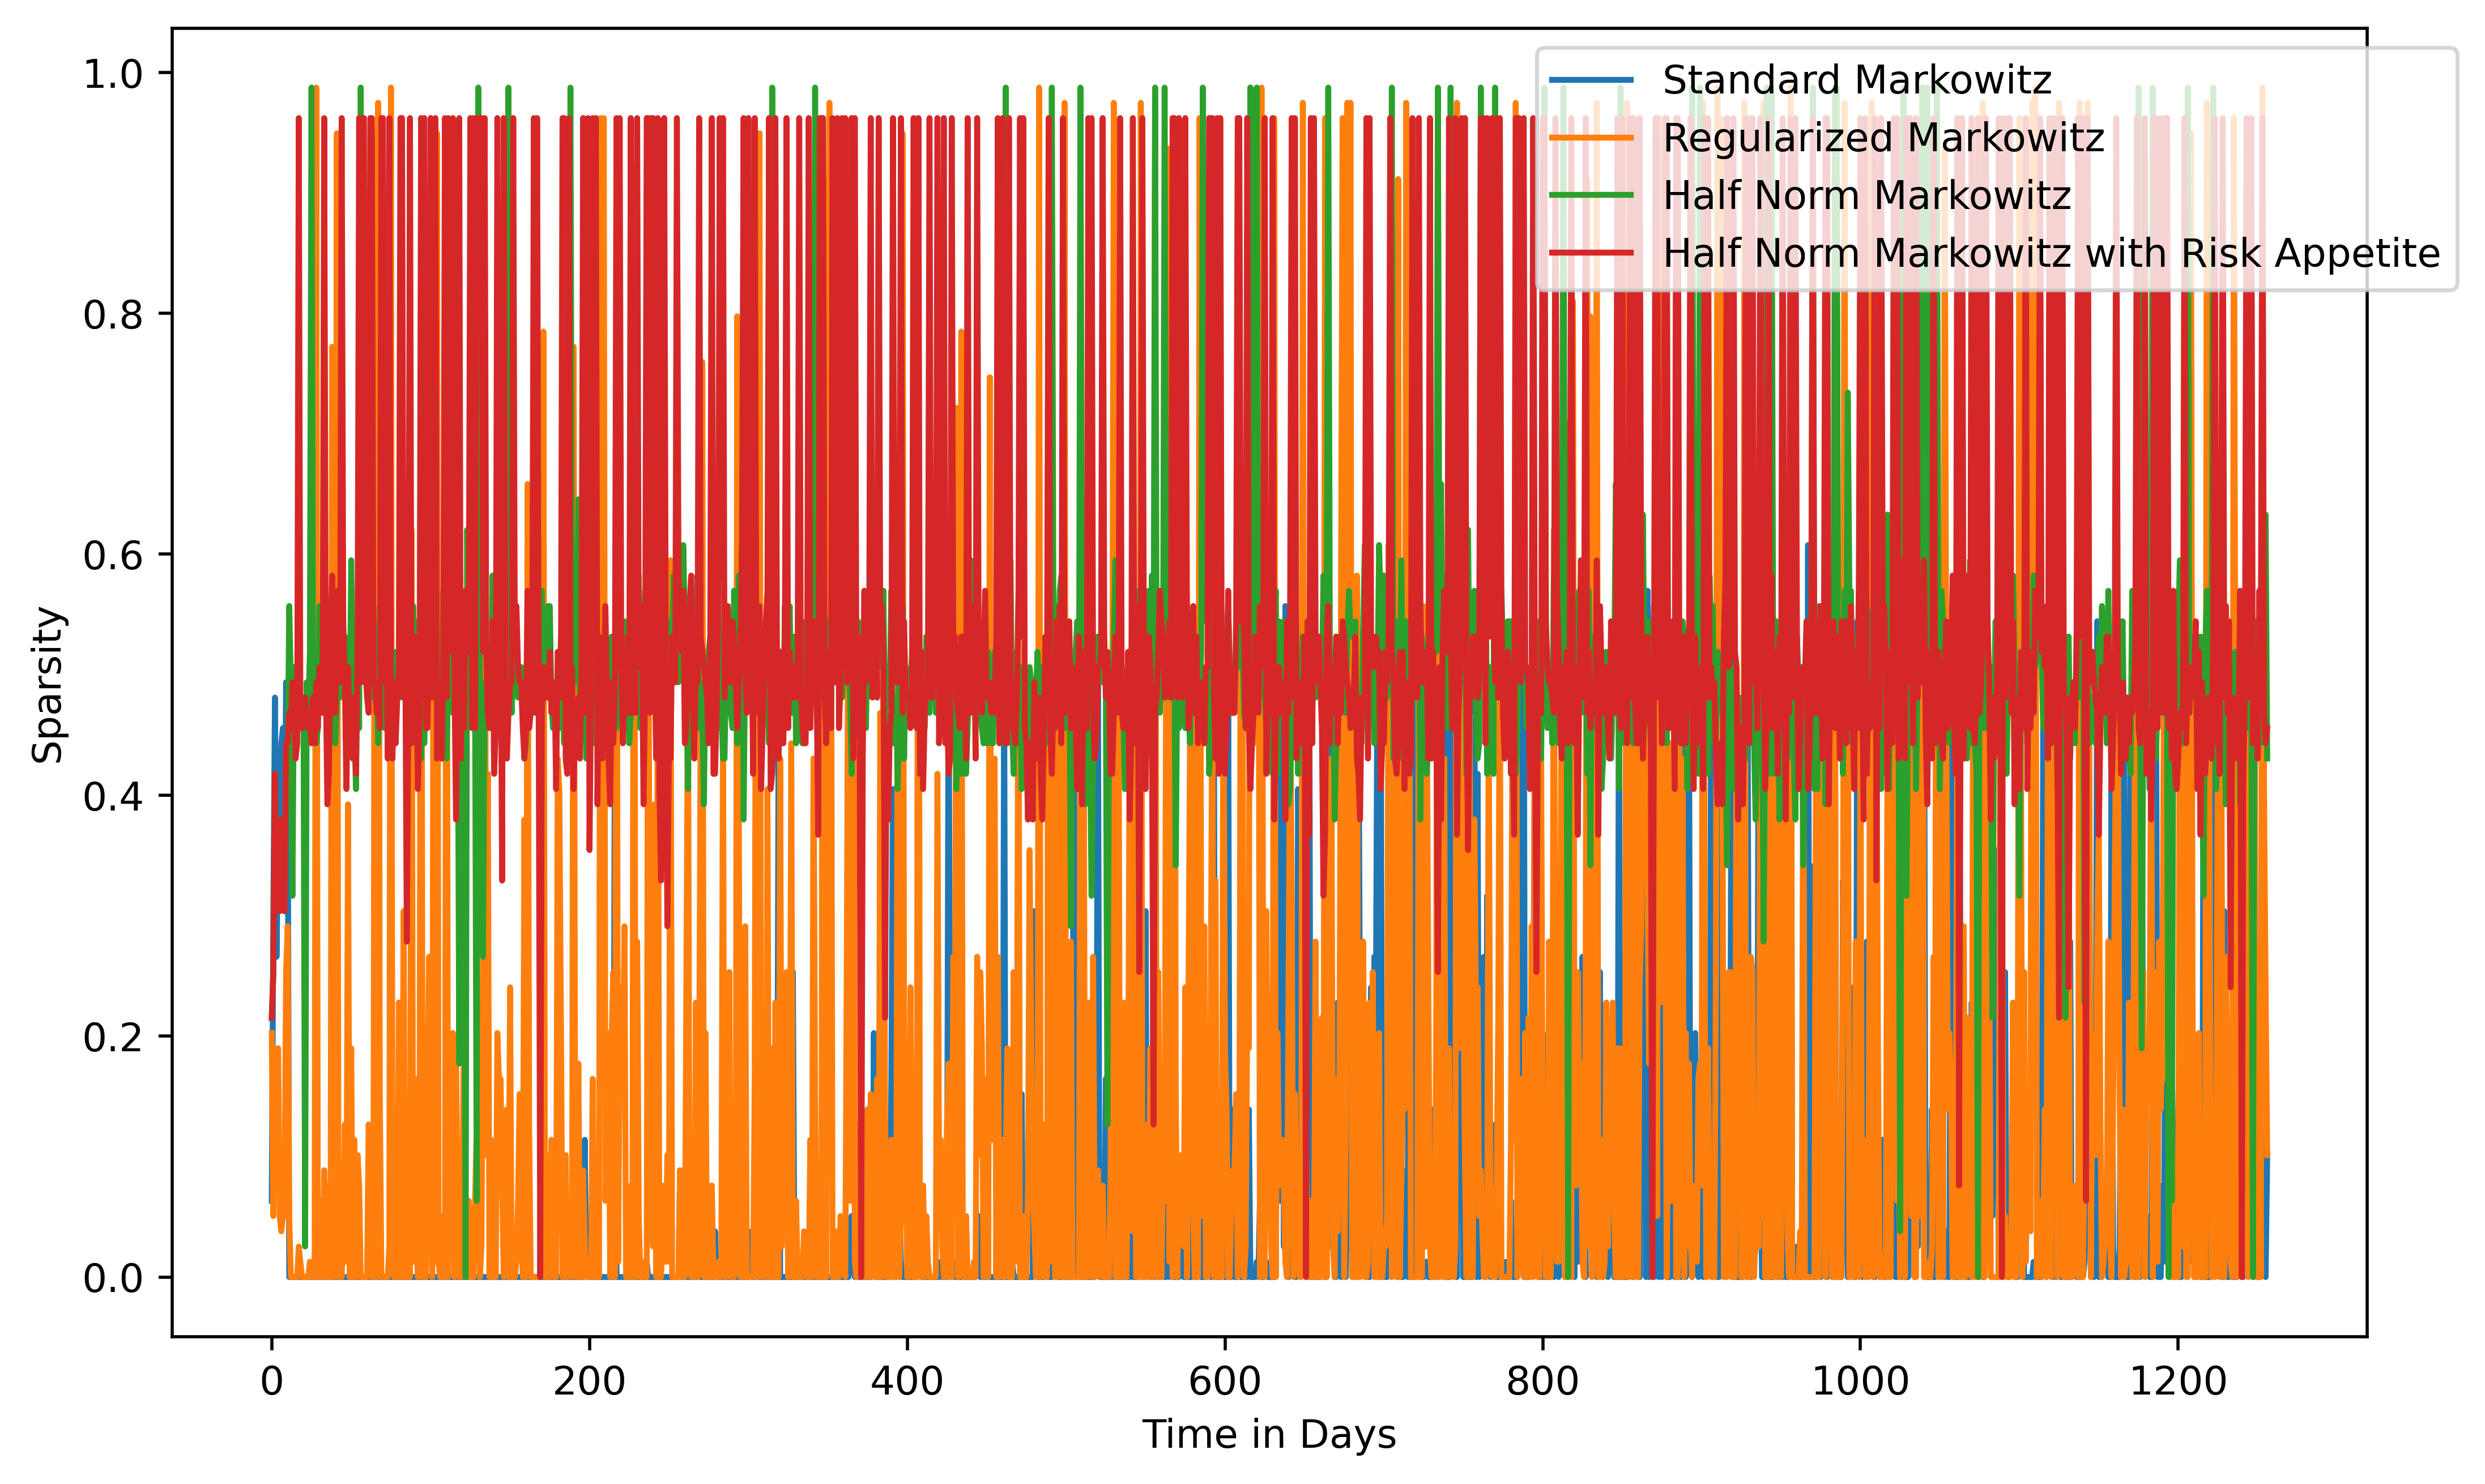

In [56]:
sparsity_std = []
sparsity_reg = []
sparsity_half = []
sparsity_risk = []


for i in range(0, len(weights_std)):
    count_std = 0
    count_reg = 0
    count_half = 0
    count_risk = 0
    for j in range(0, len(weights_std[0])):
        if weights_std[i][j] == 0:
            count_std += 1
        if weights_reg[i][j] == 0:
            count_reg += 1
        if weights_half[i][j] == 0:
            count_half += 1
        if weights_risk[i][j] == 0:
            count_risk += 1
    sparsity_std.append(count_std/len(weights_std[0]))
    sparsity_reg.append(count_reg/len(weights_reg[0]))
    sparsity_half.append(count_half/len(weights_half[0]))
    sparsity_risk.append(count_risk/len(weights_risk[0]))

plt.figure(figsize=(10, 6), dpi=500)
plt.plot(sparsity_std, label='Standard Markowitz')
plt.plot(sparsity_reg, label='Regularized Markowitz')
plt.plot(sparsity_half, label='Half Norm Markowitz')
plt.plot(sparsity_risk, label='Half Norm Markowitz with Risk Appetite')
plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1.0),)
plt.xlabel('Time in Days')
plt.ylabel('Sparsity')
plt.savefig('./adjusted/sparsity.png', dpi=500)